# Projet INF586:
## Gain in the main lobe

###### Flavien Solt, X2016

## Beam aspect

### Gain in function of the main lobe size

Notations:

* $\theta$: The angle uniformly covered by the main lobe.
* $\epsilon$: The uniform gain outside the main lobe.

In [2]:
from math import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

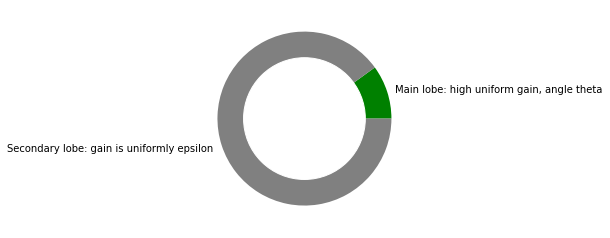

In [3]:
theta = np.pi*0.2

names='Main lobe: high uniform gain, angle theta', 'Secondary lobe: gain is uniformly epsilon'
size=[theta, 2*np.pi-theta]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['green','grey'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('gain_main_lobe_shape.png', dpi=300)


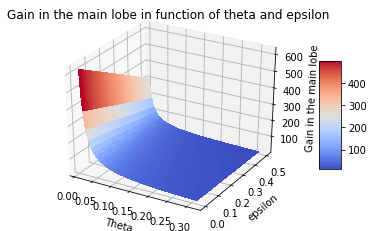

In [4]:
def Gx(pTheta, pEpsilon):
    return (2*pi - (2*pi - pTheta)*pEpsilon)/pTheta

Gx = np.vectorize(Gx)

fig = plt.figure()
ax = fig.gca(projection='3d')

theta_max = pi/6

thetas = np.linspace(0.01, pi/10, 100) # Thetas
epsilons = np.linspace(0, 0.5, 100) # Epsilon
X, Y = np.meshgrid(thetas, epsilons)

Z = Gx(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Theta')
ax.set_ylabel('epsilon')
ax.set_zlabel('Gain in the main lobe')
ax.set_title('Gain in the main lobe in function of theta and epsilon')

plt.savefig('gain_main_lobe_2d.png', dpi=300)

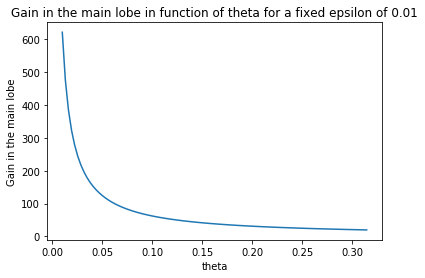

In [5]:
fixed_eps = 0.01

Z = Gx(thetas, np.array([fixed_eps for x in thetas]))

plt.title("Gain in the main lobe in function of theta for a fixed epsilon of "+str(fixed_eps))
plt.xlabel("theta")
plt.ylabel("Gain in the main lobe")

plt.plot(thetas, Z)
plt.savefig('gain_main_lobe_1d.png', dpi=300)